In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp
mp.style.use('classic')

# Read simulation files
def datafileread(measurename,skipfirstrows,delim=','):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=delim,
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
dummy, dummy, dummy, mes_time, mes_voltage = datafileread('N1_Ch1.csv',6)
sim_par_time, sim_par_voltage = datafileread('simulation_N1_parasitics.csv',1,delim=' ')
sim_time, sim_voltage = datafileread('simulation_N1.csv',1,delim=' ')

sim_time *= 1e9
sim_par_time *= 1e9
mes_time *= 1e9
mes_time += 17

#Attenuator FAS 10 20, voltage divided by 10
mes_voltage *= 10
#Voltage to current
mes_current = mes_voltage / 2 
# Voltage to current
sim_current = sim_voltage / (100.0/52.0)
sim_par_current = sim_par_voltage / (100.0/52.0)

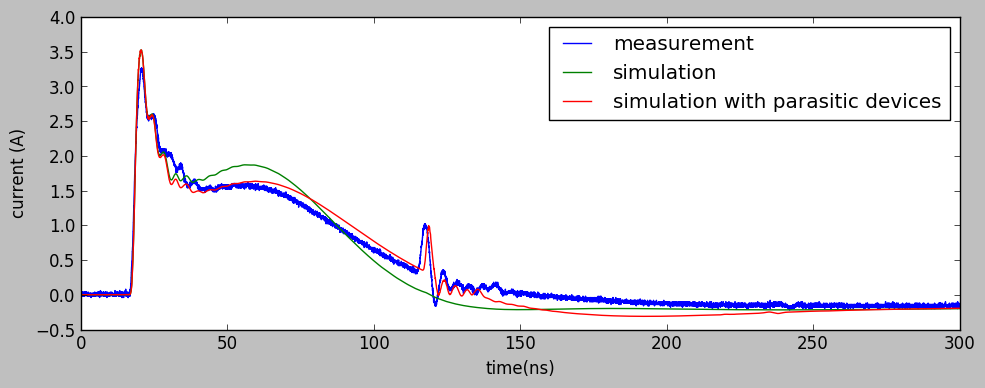

In [2]:
#
f, ax2 = plt.subplots(1,1,figsize=(10,4))
ax2.plot(mes_time, mes_current, label="measurement")
ax2.plot(sim_time, sim_current, label="simulation")
ax2.plot(sim_par_time, sim_par_current, label="simulation with parasitic devices")
ax2.set_xlim([0, 300])
#ax2.set_ylim([-4, 13])
#ax2.set_title('V(clamp9) (first block output)')
ax2.set_xlabel('time(ns)')
ax2.set_ylabel('current (A)')

#
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("../../src/5/figures/tlp_hmm_waveforms.png", pad_inches=0.3)
plt.show()